# Batches and dataloaders

One of the handy options about using pytorch is that it can handle batches almost automatically.

This is useful because instead of doing the optimization step over all the dataset we can do it over the batches.

Also we will look in a way to prevent overfitting, using splits of the data, train, validation and test.

In [29]:
import torch 
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.datasets import load_wine
import torch.nn as nn 

In [2]:
X, y = load_wine(return_X_y=True)
print(f"X shape: {X.shape}") #samples, features
print(f"y shape: {y.shape}") 

X shape: (178, 13)
y shape: (178,)


We can use pytorch to load our data in a smart way:

1. We will create a Dataset object inheriting the Dataset module.
2. We will define 3 main functions inside of it:
    1. **init:** constructor of the class
    2. **getitem:** we will have the ability to select entries of the tensor
    3. **len:** it will return the size of the object

In [4]:
class WineData(Dataset):
    def __init__(self):
        x, y = load_wine(return_X_y=True)
        self.x = torch.from_numpy(x.astype(np.float32)) #remember that float32 is the standard dtype in torch
        self.y = torch.from_numpy(y[:,np.newaxis].astype(np.float32)) #pytorch doesnt like empty axis (x,) -> (x,1)
        self.n_samples = x.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.n_samples

In [5]:
dataset = WineData()
dataset[0]

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([0.]))

## Why we did all of this? 

Well, now that we have a dataset object we can use the dataloader from torch to work directly with batches, and shuffling the data on the go.

In [13]:
dataloader = DataLoader(dataset=dataset,batch_size=6,shuffle=True)

In [26]:
num_epochs = 3

In [27]:
for epoch in range(num_epochs):
    for i, (inputs,labels) in enumerate(dataloader):
        if (i+1) % 10 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}')
            print(f'step: {i+1}')

epoch: 1/3
step: 10
epoch: 1/3
step: 20
epoch: 1/3
step: 30
epoch: 2/3
step: 10
epoch: 2/3
step: 20
epoch: 2/3
step: 30
epoch: 3/3
step: 10
epoch: 3/3
step: 20
epoch: 3/3
step: 30


# Full Feedforward net example 

### First we will set up our device:

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

We will use the MNIST dataset since it is easy to load it.

In [31]:
train_data = torchvision.datasets.MNIST(root='./dataset', 
train = True, transform = transforms.ToTensor(), download = True)

0.5%

100.0%


Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw


102.8%
2.8%


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



100.0%
112.7%
/home/mano/.local/share/virtualenvs/Pytorch_Intro-tTLkiOo3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [32]:
test_data = torchvision.datasets.MNIST(root='./dataset', 
train = False, transform = transforms.ToTensor())

We will set up all our hyperparameters and use a DataLoader:

In [33]:
input_size = 784 # we know that images are 28x28
hidden_size = 20
n_class = 10 # 10 digits
n_epochs = 4
batch_size = 50
lr = 0.001

In [34]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
batch_size = batch_size, shuffle= True)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
batch_size = batch_size, shuffle= False)

Lets verify our data with a visualization, DataLoader object is a iterator so:

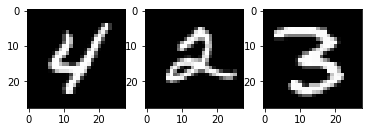

In [42]:
import matplotlib.pyplot as plt
data = iter(train_loader)
samples, labels = data.next() # we unpack next values
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(samples[i,0],cmap='gray')

Our data is correctly loaded, we need to specify our model and train it.

In [ ]:
class NN(nn.Module):
    def __init__(self,input_size,hidden_size,n_class):
        super(NN, self).__init__()